In [205]:
from repro_eval.Evaluator import RpdEvaluator, RplEvaluator
from repro_eval.util import arp, arp_scores, print_base_adv, print_simple_line, trim

import pytrec_eval
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
colors = sns.color_palette()
sns.set_style('darkgrid')

# Harmonize Data

In [206]:
core_queries = pd.read_csv("../data/core_queries.tsv", sep="\t")
core_queries.rename(columns={"qid": "qid_LT"}, inplace=True)

In [207]:
def harmonize_run(run_path, t, name):
    if type(run_path) == str:
        df = pd.read_csv(run_path, sep=" ", header=None, names=["qid", "Q0", "docid", "rank", "rel", "name"])
    else:
        df = run_path

    # limit to core queries
    df = df[df["qid"].isin(core_queries["qid_"+t])]

    num = len(df["qid"].unique())
    print(t, num, "queries in qrels")

    patch = {}
    for idx, row in core_queries.iterrows():
        patch[row["qid_"+t]] = row["qid_WT"]

    df["qid"] = df["qid"].apply(lambda x: patch[x])
    print("duplicates", df.duplicated(subset=["qid", "docid"]).sum())
    df.drop_duplicates(subset=["qid", "docid"], inplace=True)

    df.to_csv("../data/replicability/"+name, sep=" ", header=None, index=False)

In [208]:
def harmonize_qrels(qrels_path, t):
    if type(qrels_path) == str:
        df = pd.read_csv(qrels_path, sep=" ", header=None, names=["qid", "Q0", "docid", "rel", "name"])
    else:
        df = qrels_path
    # limit to core queries
    df = df[df["qid"].isin(core_queries["qid_"+t])]
    num = len(df["qid"].unique())
    print(t, num, "queries in qrels")

    patch = {}
    for idx, row in core_queries.iterrows():
        patch[row["qid_"+t]] = row["qid_WT"]
    
    df["qid"] = df["qid"].apply(lambda x: patch[x])

    print("duplicates", df.duplicated(subset=["qid", "docid"]).sum())
    df.drop_duplicates(subset=["qid", "docid"], inplace=True)

    df.to_csv(f"../data/replicability/qrels_{t}.txt", sep=" ", header=None, index=False)

In [209]:
# Harmonize queries
### Modify runs
queries_WT_path = "../data/publish/English/Queries/heldout.trec"
queries_ST_path = "../data/test-collection/A-Short-July/English/Queries/test07.trec"
queries_LT_path = "../data/test-collection/B-Long-September/English/Queries/test09.trec"

In [210]:
# modify runs
## Baseline
run_BM25_train_WT = "../results/train/IRC_BM25.WT"
run_BM25_test_WT = "../results/submission/IRC_BM25.WT"
run_BM25_ST = "../results/submission/IRC_BM25.ST"
run_BM25_LT = "../results/submission/IRC_BM25.LT"

## Advanced
run_E5_train_WT = "../results/train/IRC_E5_base.WT-train"
run_E5_test_WT = "../results/submission/IRC_E5_base.WT"
run_E5_ST = "../results/submission/IRC_E5_base.ST"
run_E5_LT = "../results/submission/IRC_E5_base.LT"

run_colbert_test_WT = "../results/submission/IRC_BM25+colBERT.WT"
run_colbert_train_WT = "../results/train/IRC_BM25+colBERT.WT"
run_colbert_ST = "../results/submission/IRC_BM25+colBERT.ST"
run_colbert_LT = "../results/submission/IRC_BM25+colBERT.LT"

run_monoT5_test_WT = "../results/submission/IRC_BM25+monoT5.WT"
run_monoT5_train_WT = "../results/train/IRC_BM25+monoT5.WT"
run_monoT5_ST = "../results/submission/IRC_BM25+monoT5.ST"
run_monoT5_LT = "../results/submission/IRC_BM25+monoT5.LT"

run_d2q_test_WT = "../results/submission/IRC_d2q+BM25.WT"
run_d2q_train_WT = "../results/train/IRC_d2q+BM25.WT"
run_d2q_ST = "../results/submission/IRC_d2q+BM25.ST"
rub_d2q_LT = "../results/submission/IRC_d2q+BM25.LT"

run_RRF_test_WT = "../results/submission/IRC_RRF(BM25+Bo1-XSqrA_M-PL2).WT"
run_RRF_train_WT = "../results/train/IRC_RRF(BM25+Bo1-XSqrA_M-PL2).WT"
run_RRF_ST = "../results/submission/IRC_RRF(BM25+Bo1-XSqrA_M-PL2).ST"
run_RRF_LT = "../results/submission/IRC_RRF(BM25+Bo1-XSqrA_M-PL2).LT"

In [211]:
qrels_WT_test_path = "../data/longeval-relevance-judgements/heldout-test.txt"
qrels_WT_train_path = "../data/publish/French/Qrels/train.txt"
qrels_ST_path = "../data/longeval-relevance-judgements/a-short-july.txt"
qrels_LT_path = "../data/longeval-relevance-judgements/b-long-september.txt"

In [212]:
df_test = pd.read_csv(run_BM25_train_WT, sep=" ", header=None, names=["qid", "Q0", "docid", "rank", "rel", "name"])
df_train = pd.read_csv(run_BM25_test_WT, sep=" ", header=None, names=["qid", "Q0", "docid", "rank", "rel", "name"])
run_BM25 = pd.concat([df_test, df_train])
harmonize_run(run_BM25, "WT", "IRC_BM25.WT")
harmonize_run(run_BM25_ST, "ST", "IRC_BM25.ST")
harmonize_run(run_BM25_LT, "LT", "IRC_BM25.LT")

df_test = pd.read_csv(run_E5_train_WT, sep=" ", header=None, names=["qid", "Q0", "docid", "rank", "rel", "name"])
df_train = pd.read_csv(run_E5_test_WT, sep=" ", header=None, names=["qid", "Q0", "docid", "rank", "rel", "name"])
run_E5 = pd.concat([df_test, df_train])
harmonize_run(run_E5, "WT", "IRC_E5_base.WT")
harmonize_run(run_E5_ST, "ST", "IRC_E5_base.ST")
harmonize_run(run_E5_LT, "LT", "IRC_E5_base.LT")

df_test = pd.read_csv(run_colbert_train_WT, sep=" ", header=None, names=["qid", "Q0", "docid", "rank", "rel", "name"])
df_train = pd.read_csv(run_colbert_test_WT, sep=" ", header=None, names=["qid", "Q0", "docid", "rank", "rel", "name"])
run_colbert = pd.concat([df_test, df_train])
harmonize_run(run_colbert, "WT", "IRC_BM25+colBERT.WT")
harmonize_run(run_colbert_ST, "ST", "IRC_BM25+colBERT.ST")
harmonize_run(run_colbert_LT, "LT", "IRC_BM25+colBERT.LT")

df_test = pd.read_csv(run_monoT5_train_WT, sep=" ", header=None, names=["qid", "Q0", "docid", "rank", "rel", "name"])
df_train = pd.read_csv(run_monoT5_test_WT, sep=" ", header=None, names=["qid", "Q0", "docid", "rank", "rel", "name"])
run_monoT5 = pd.concat([df_test, df_train])
harmonize_run(run_monoT5, "WT", "IRC_BM25+monoT5.WT")
harmonize_run(run_monoT5_ST, "ST", "IRC_BM25+monoT5.ST")
harmonize_run(run_monoT5_LT, "LT", "IRC_BM25+monoT5.LT")

df_test = pd.read_csv(run_d2q_train_WT, sep=" ", header=None, names=["qid", "Q0", "docid", "rank", "rel", "name"])
df_train = pd.read_csv(run_d2q_test_WT, sep=" ", header=None, names=["qid", "Q0", "docid", "rank", "rel", "name"])
run_d2q = pd.concat([df_test, df_train])
harmonize_run(run_d2q, "WT", "IRC_d2q+BM25.WT")
harmonize_run(run_d2q_ST, "ST", "IRC_d2q+BM25.ST")
harmonize_run(rub_d2q_LT, "LT", "IRC_d2q+BM25.LT")

df_test = pd.read_csv(run_RRF_train_WT, sep=" ", header=None, names=["qid", "Q0", "docid", "rank", "rel", "name"])
df_train = pd.read_csv(run_RRF_test_WT, sep=" ", header=None, names=["qid", "Q0", "docid", "rank", "rel", "name"])
run_RRF = pd.concat([df_test, df_train])
harmonize_run(run_RRF, "WT", "IRC_RRF(BM25+Bo1-XSqrA_M-PL2).WT")
harmonize_run(run_RRF_ST, "ST", "IRC_RRF(BM25+Bo1-XSqrA_M-PL2).ST")
harmonize_run(run_RRF_LT, "LT", "IRC_RRF(BM25+Bo1-XSqrA_M-PL2).LT")

WT 135 queries in qrels
duplicates 0


/tmp/ipykernel_5237/4290265761.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["qid"] = df["qid"].apply(lambda x: patch[x])
/tmp/ipykernel_5237/4290265761.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=["qid", "docid"], inplace=True)


ST 136 queries in qrels
duplicates 11541
LT 131 queries in qrels
duplicates 7000
WT 135 queries in qrels
duplicates 0


/tmp/ipykernel_5237/4290265761.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["qid"] = df["qid"].apply(lambda x: patch[x])
/tmp/ipykernel_5237/4290265761.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=["qid", "docid"], inplace=True)


ST 136 queries in qrels
duplicates 12000
LT 131 queries in qrels
duplicates 7000
WT 135 queries in qrels
duplicates 0


/tmp/ipykernel_5237/4290265761.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["qid"] = df["qid"].apply(lambda x: patch[x])
/tmp/ipykernel_5237/4290265761.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=["qid", "docid"], inplace=True)


ST 136 queries in qrels
duplicates 11541
LT 131 queries in qrels
duplicates 7000
WT 135 queries in qrels
duplicates 0


/tmp/ipykernel_5237/4290265761.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["qid"] = df["qid"].apply(lambda x: patch[x])
/tmp/ipykernel_5237/4290265761.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=["qid", "docid"], inplace=True)


ST 136 queries in qrels
duplicates 11541
LT 131 queries in qrels
duplicates 7000
WT 135 queries in qrels
duplicates 0


/tmp/ipykernel_5237/4290265761.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["qid"] = df["qid"].apply(lambda x: patch[x])
/tmp/ipykernel_5237/4290265761.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=["qid", "docid"], inplace=True)


ST 136 queries in qrels
duplicates 11541
LT 131 queries in qrels
duplicates 7000
WT 135 queries in qrels
duplicates 0


/tmp/ipykernel_5237/4290265761.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["qid"] = df["qid"].apply(lambda x: patch[x])
/tmp/ipykernel_5237/4290265761.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=["qid", "docid"], inplace=True)


ST 136 queries in qrels
duplicates 12000
LT 131 queries in qrels
duplicates 7000


In [58]:
df_test = pd.read_csv(qrels_WT_test_path, sep=" ", header=None, names=["qid", "Q0", "docid", "rel"])
df_train = pd.read_csv(qrels_WT_train_path, sep=" ", header=None, names=["qid", "Q0", "docid", "rel"])
qrels_WT = pd.concat([df_test, df_train])

harmonize_qrels(qrels_WT, "WT")
harmonize_qrels(qrels_ST_path, "ST")
harmonize_qrels(qrels_LT_path, "LT")

WT 135 queries in qrels
duplicates 0
ST 136 queries in qrels
duplicates 67
LT 131 queries in qrels
duplicates 42


/tmp/ipykernel_44881/3307354196.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["qid"] = df["qid"].apply(lambda x: patch[x])
/tmp/ipykernel_44881/3307354196.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=["qid", "docid"], inplace=True)


# Data

In [213]:
runs = {
    "WT": {"runs":{
        "E5": {"path": "../data/replicability/IRC_E5_base.WT"},
        "colBERT": {"path": "../data/replicability/IRC_BM25+colBERT.WT"},
        "monoT5": {"path": "../data/replicability/IRC_BM25+monoT5.WT"},
        "d2q": {"path": "../data/replicability/IRC_d2q+BM25.WT"},
        "RRF": {"path": "../data/replicability/IRC_RRF(BM25+Bo1-XSqrA_M-PL2).WT"},
    }, 
        "qrel": {"path": "../data/replicability/qrels_WT.txt"},
        "pivot": {"path": "../data/replicability/IRC_BM25.WT"},
        },
    "ST": {"runs":{
        "E5": {"path": "../data/replicability/IRC_E5_base.ST"},
        "colBERT": {"path": "../data/replicability/IRC_BM25+colBERT.ST"},
        "monoT5": {"path": "../data/replicability/IRC_BM25+monoT5.ST"},
        "d2q": {"path": "../data/replicability/IRC_d2q+BM25.ST"},
        "RRF": {"path": "../data/replicability/IRC_RRF(BM25+Bo1-XSqrA_M-PL2).ST"},
    }, 
        "qrel": {"path": "../data/replicability/qrels_ST.txt"},
        "pivot": {"path": "../data/replicability/IRC_BM25.ST"},
    },
    "LT": {"runs":{
        "E5": {"path": "../data/replicability/IRC_E5_base.LT"},
        "colBERT": {"path": "../data/replicability/IRC_BM25+colBERT.LT"},
        "monoT5": {"path": "../data/replicability/IRC_BM25+monoT5.LT"},
        "d2q": {"path": "../data/replicability/IRC_d2q+BM25.LT"},
        "RRF": {"path": "../data/replicability/IRC_RRF(BM25+Bo1-XSqrA_M-PL2).LT"},
    },
        "qrel": {"path": "../data/replicability/qrels_LT.txt"},
        "pivot": {"path": "../data/replicability/IRC_BM25.LT"},
    }
}


In [129]:
# runs = {
#     "WT": {"runs":{
#         "E5": {"path": "../results/submission/IRC_E5_base.WT"},
#         "colBERT": {"path": "../results/submission/IRC_BM25+colBERT.WT"},
#         "monoT5": {"path": "../results/submission/IRC_BM25+monoT5.WT"},
#         "d2q": {"path": "../results/submission/IRC_d2q+BM25.WT"},
#         "RRF": {"path": "../results/submission/IRC_RRF(BM25+Bo1-XSqrA_M-PL2).WT"},
#     }, 
#         "qrel": {"path": "../data/longeval-relevance-judgements/heldout-test.txt"},
#         "pivot": {"path": "../results/submission/IRC_BM25.WT"},
#         },
#     "ST": {"runs":{
#         "E5": {"path": "../results/submission/IRC_E5_base.ST"},
#         "colBERT": {"path": "../results/submission/IRC_BM25+colBERT.ST"},
#         "monoT5": {"path": "../results/submission/IRC_BM25+monoT5.ST"},
#         "d2q": {"path": "../results/submission/IRC_d2q+BM25.ST"},
#         "RRF": {"path": "../results/submission/IRC_RRF(BM25+Bo1-XSqrA_M-PL2).ST"},
#     }, 
#         "qrel": {"path": "../data/longeval-relevance-judgements/a-short-july.txt"},
#         "pivot": {"path": "../results/submission/IRC_BM25.ST"},
#     },
#     "LT": {"runs":{
#         "E5": {"path": "../results/submission/IRC_E5_base.LT"},
#         "colBERT": {"path": "../results/submission/IRC_BM25+colBERT.LT"},
#         "monoT5": {"path": "../results/submission/IRC_BM25+monoT5.LT"},
#         "d2q": {"path": "../results/submission/IRC_d2q+BM25.LT"},
#         "RRF": {"path": "../results/submission/IRC_RRF(BM25+Bo1-XSqrA_M-PL2).LT"},
#     },
#         "qrel": {"path": "../data/longeval-relevance-judgements/b-long-september.txt"},
#         "pivot": {"path": "../results/submission/IRC_BM25.LT"},
#     }
# }

In [214]:
# evaluate
# add empty toipics
# all_topics = 


for subcollection , content in runs.items(): 
    with open(content.get('qrel').get('path'), "r") as f_qrels:
        qrels = pytrec_eval.parse_qrel(f_qrels)
    evaluator = pytrec_eval.RelevanceEvaluator(qrels, pytrec_eval.supported_measures)

    for run_name, info in content["runs"].items():
        
        with open(info.get('path')) as run_file:
            info['run'] = pytrec_eval.parse_run(run_file)
            info["score"] = evaluator.evaluate(info.get('run'))
            info["arp"] = arp_scores(info.get('score'))
    
    baseline = content.get('pivot').get('path')
    content["pivot"]["run"] = pytrec_eval.parse_run(open(baseline))
    content["pivot"]["score"] = evaluator.evaluate(content["pivot"]["run"])
    content["pivot"]["arp"] = arp_scores(content["pivot"]["score"])

# Results

In [216]:
table = []
measures=['P_20', 'ndcg', 'bpref']

for subcollection , content in runs.items(): 
    for run_name, info in content["runs"].items():
        for measure in measures:
            table.append(
                {"sub-collection": subcollection, "run": run_name, "measure": measure, "value": info.get('arp').get(measure)}
            )
    for measure in measures:
        table.append(
            {"sub-collection": subcollection, "run": "baseline", "measure": measure, "value": content.get('pivot').get('arp').get(measure)}
        )    

In [217]:
result_table = pd.DataFrame(table).pivot(index=["measure", "run"], columns="sub-collection", values="value")[["WT", "ST", "LT"]]

# $\mathcal{R}_e\Delta$

In [218]:
result_table["RD(WT, ST)"] = abs(result_table["WT"] - result_table["ST"])
result_table["RD(WT, LT)"] = abs(result_table["WT"] - result_table["LT"])

In [167]:
result_table.to_csv("../results/ee_table.tsv", sep="\t")

In [219]:
result_table

sub-collection          WT        ST        LT  RD(WT, ST)  RD(WT, LT)
measure run                                                           
P_20    E5        0.070741  0.065726  0.087903    0.005015    0.017162
        RRF       0.074815  0.068952  0.087500    0.005863    0.012685
        baseline  0.069630  0.067339  0.084677    0.002291    0.015048
        colBERT   0.072222  0.070565  0.087097    0.001658    0.014875
        d2q       0.078519  0.071774  0.091129    0.006744    0.012611
        monoT5    0.081481  0.081452  0.095968    0.000030    0.014486
bpref   E5        0.367662  0.354006  0.370548    0.013656    0.002886
        RRF       0.346106  0.327578  0.347453    0.018529    0.001346
        baseline  0.313709  0.314200  0.323970    0.000491    0.010261
        colBERT   0.324366  0.317242  0.337591    0.007123    0.013225
        d2q       0.335431  0.331125  0.368159    0.004306    0.032729
        monoT5    0.336959  0.343508  0.336827    0.006549    0.000132
ndcg    E5        0.290108  0.299969  0.313382    0.009860    0.023274
        RRF       0.284528  0.282015  0.314451    0.002514    0.029922
        baseline  0.268898  0.271700  0.305694    0.002803    0.036797
        colBERT   0.275879  0.274782  0.297330    0.001097    0.021451
        d2q       0.285061  0.286505  0.326987    0.001444    0.041926
        monoT5    0.295462  0.302152  0.310649    0.006690    0.015187

# Delta Plots

In [220]:
# Calculate deltas
for subcollection, content in runs.items(): 
    for run_name, info in content["runs"].items():
        deltas = {}
        for topic, results in info["score"].items():
            deltas[topic] = results["ndcg"] - content["pivot"]["score"][topic]["ndcg"]
        info["topic_delta"] = deltas

In [221]:
def plot_delta(deltas, name, subcollection):
    df = pd.DataFrame.from_dict(deltas, orient='index', columns=['delta'])
    ax = df['delta'].sort_values(ascending=False).plot(figsize=(12,4), kind='bar')
    ax.set_xlabel("Topics")
    ax.set_ylabel('$\Delta$ nDCG')
    plt.xticks([])
    plt.title(f"{subcollection} per topic deltas: {name} vs. BM25")
    plt.show()

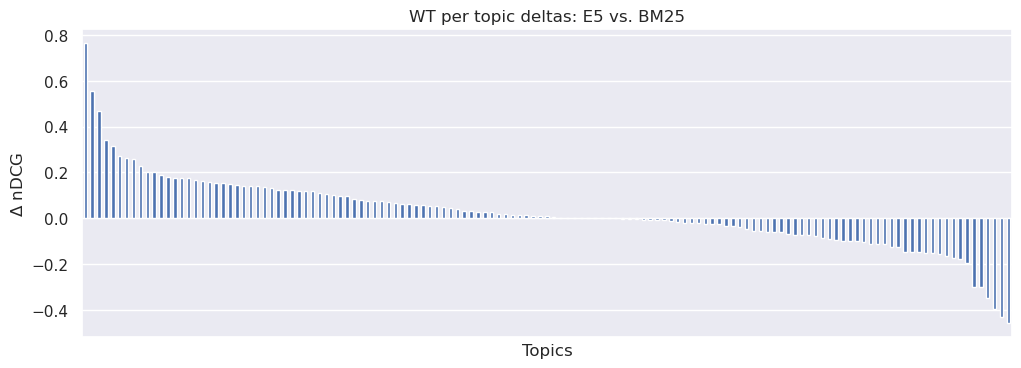

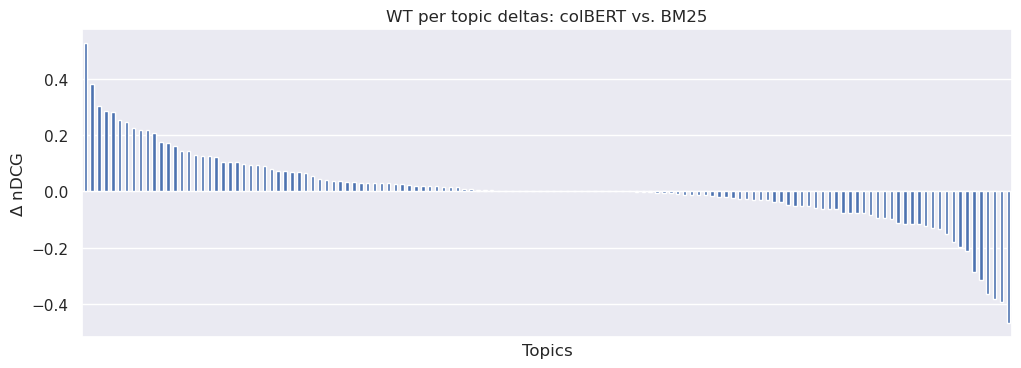

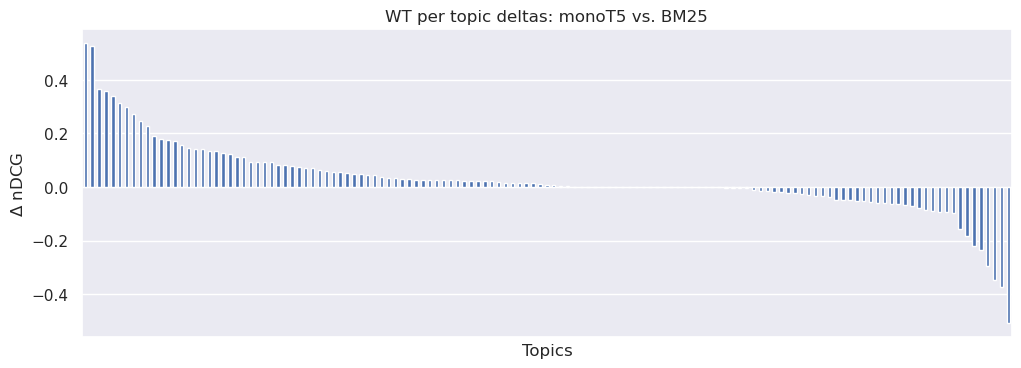

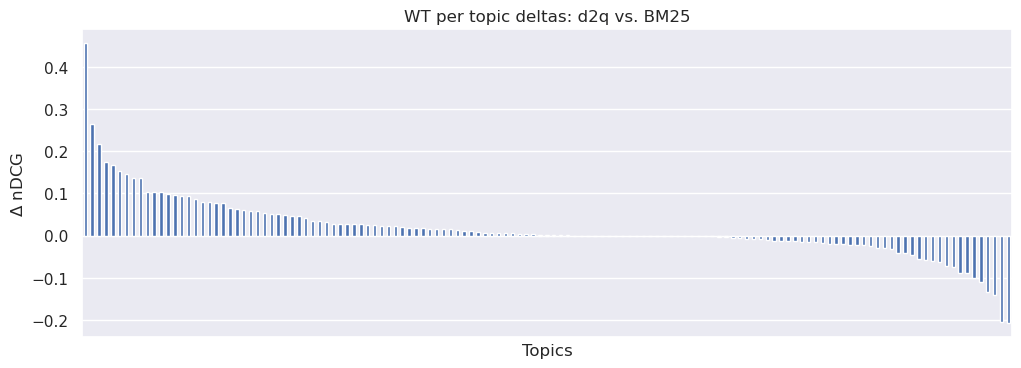

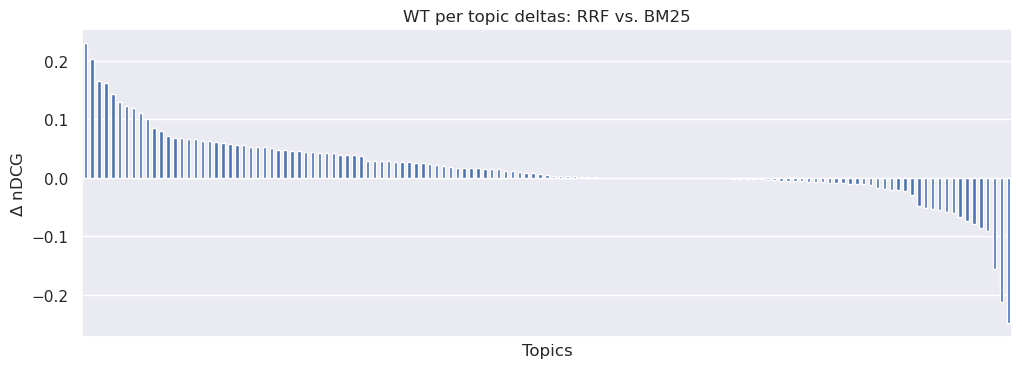

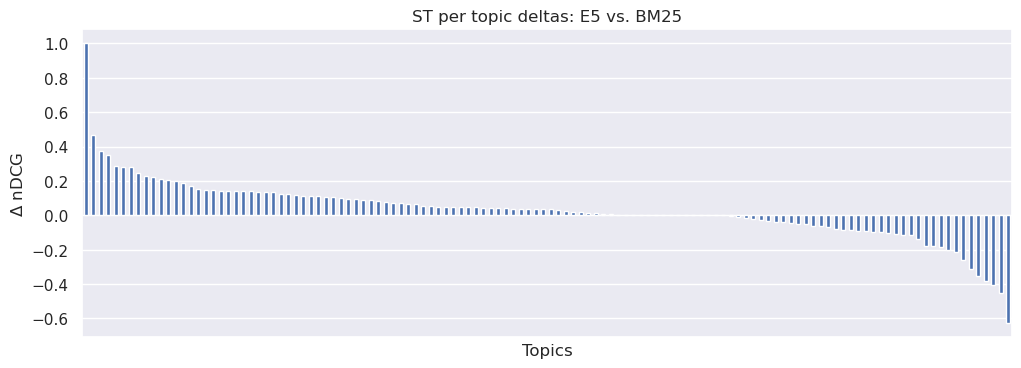

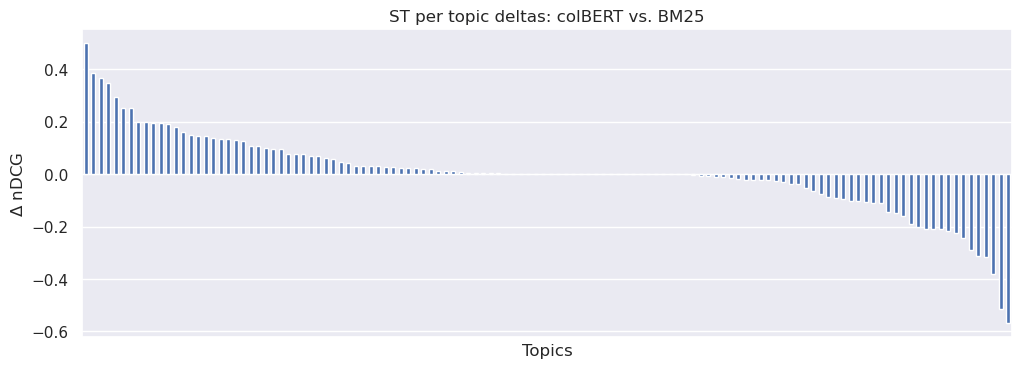

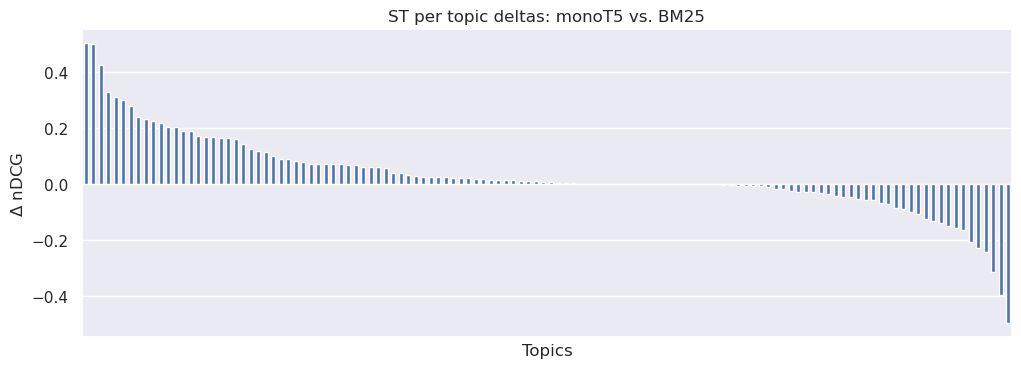

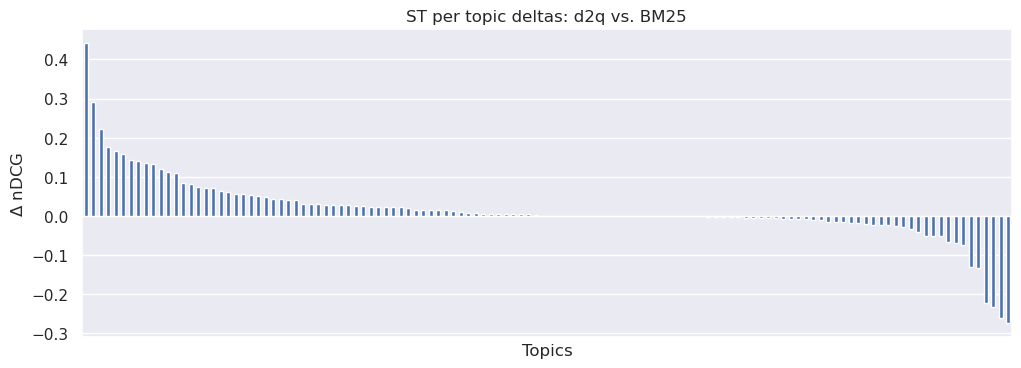

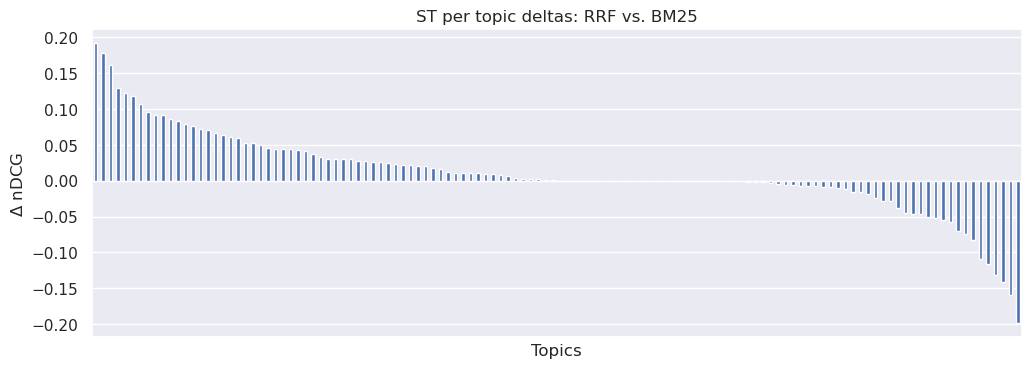

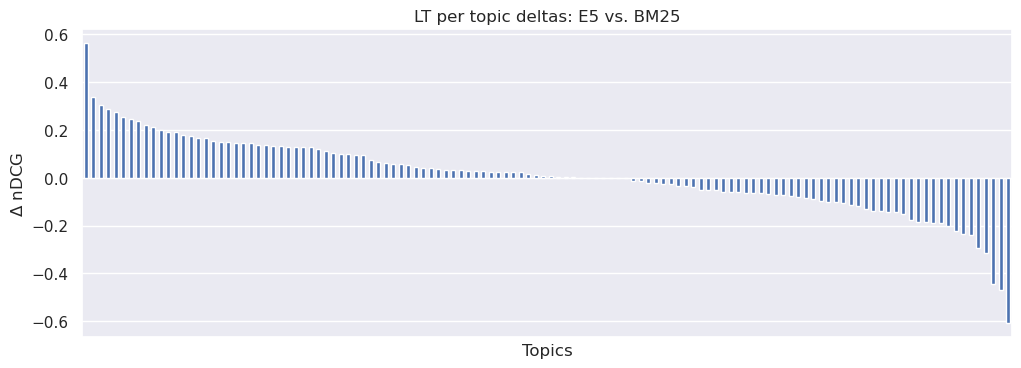

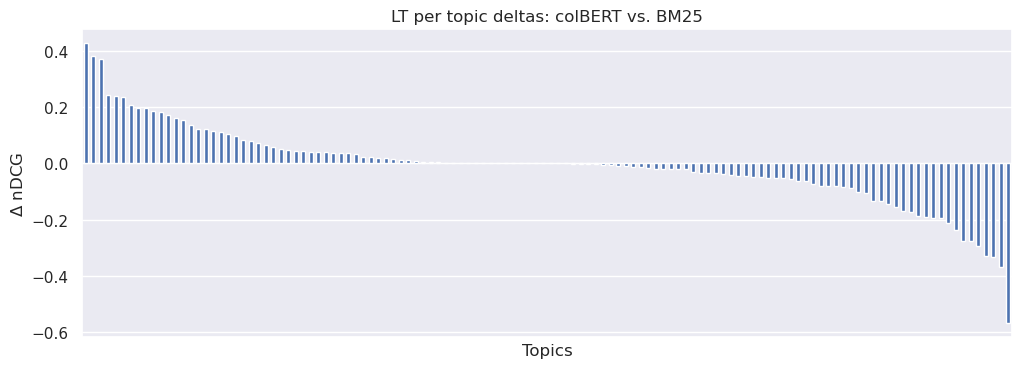

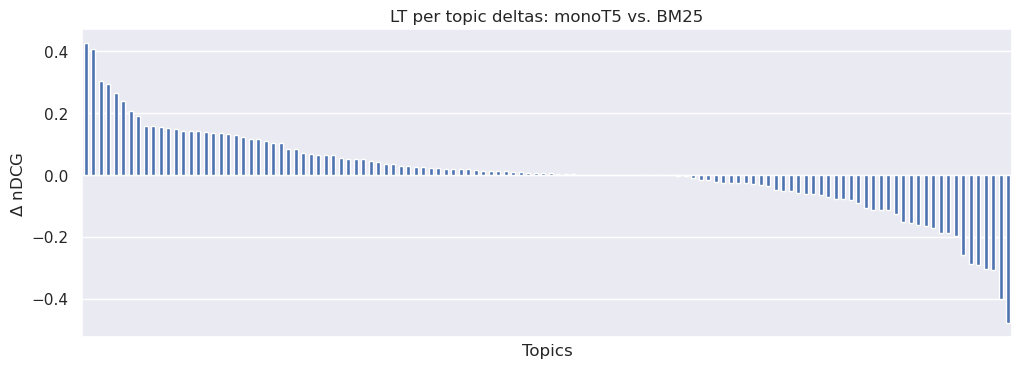

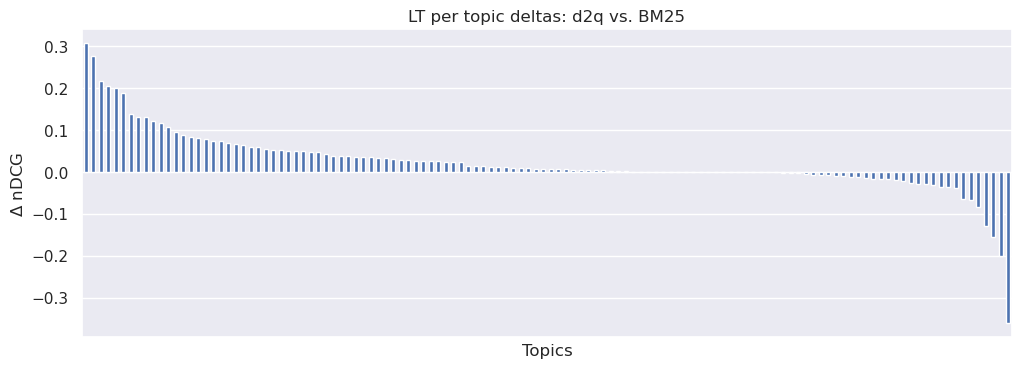

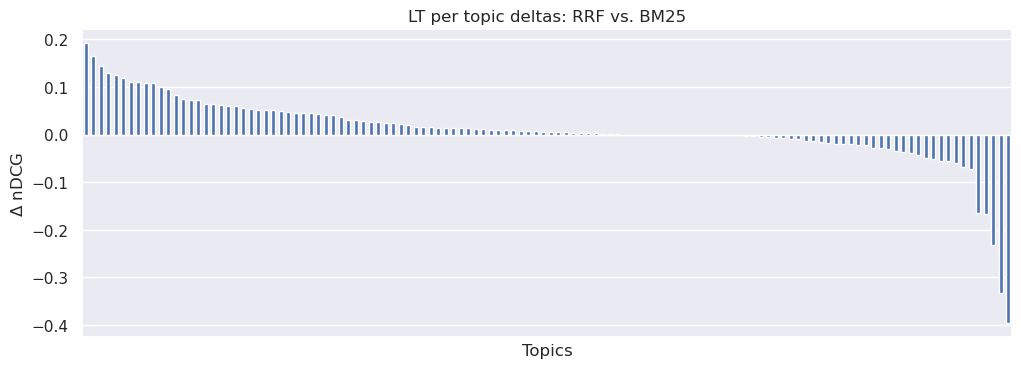

In [222]:
for subcollection, content in runs.items(): 
    for run_name, info in content["runs"].items():
        if info.get("topic_delta"):
            deltas = info.get("topic_delta")
            plot_delta(deltas, run_name, subcollection)

# ER - DRI

In [223]:
dri_er_WTST = {}

# Evaluate all runs 
for WT, ST in zip(runs["WT"]["runs"].items(), runs["ST"]["runs"].items()):
    # if WT[0].endswith("E5"):
    #     continue
    rpl_eval = RplEvaluator(qrel_orig_path=runs["WT"]["qrel"]["path"],
                            run_b_orig_path=runs["WT"]["pivot"]["path"],
                            run_a_orig_path=WT[1]["path"],
                            run_b_rep_path=runs["ST"]["pivot"]["path"],
                            run_a_rep_path=ST[1]["path"],
                            qrel_rpl_path=runs["ST"]["qrel"]["path"])

    rpl_eval.trim()
    rpl_eval.evaluate()

    # save dri, er and pval
    runs["ST"]["runs"][WT[0]]["dri"] = rpl_eval.dri()
    runs["ST"]["runs"][WT[0]]["er"] = rpl_eval.er()
    runs["ST"]["runs"][WT[0]]["pval"] = rpl_eval.ttest()

    dri_er_WTST[WT[0]] = {"dri": rpl_eval.dri(), "er": rpl_eval.er()}

/home/jueri/miniconda3/envs/LongEval/lib/python3.8/site-packages/repro_eval/measure/overall_effects.py:82: RuntimeWarning: invalid value encountered in double_scalars
  yield measure, value / mi_orig.get(measure)


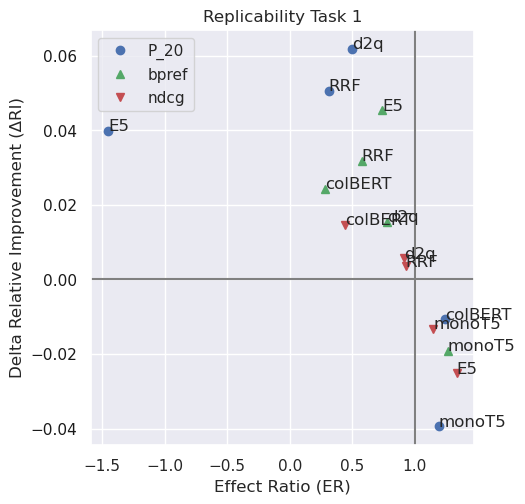

In [231]:
measures = ['P_20', 'bpref', 'ndcg']
marker_color = [('o', 'b'), ('^', 'g'), ('v', 'r')]

fig, ax1 = plt.subplots(figsize=(5, 5))
ax1.set_xlabel('Effect Ratio (ER)')
ax1.set_ylabel(u'Delta Relative Improvement (ΔRI)')

for measure, mk in zip(measures, marker_color):
    ax1.plot([dri_er_WTST[r]['er'][measure] for r in dri_er_WTST.keys()],
             [dri_er_WTST[r]['dri'][measure] for r in dri_er_WTST.keys()],
             marker=mk[0], color=mk[1], linestyle='None', label=measure)

ax1.tick_params(axis='y', labelcolor='k')
fig.tight_layout()
plt.axhline(0, color='grey')
plt.axvline(1, color='grey')
plt.legend()
plt.title('Replicability Task 1')

for m in measures:
  for r in dri_er_WTST.keys():
    plt.text(x = dri_er_WTST[r]['er'][m], 
             y = dri_er_WTST[r]['dri'][m],
             s = r) 

plt.show()

/home/jueri/miniconda3/envs/LongEval/lib/python3.8/site-packages/repro_eval/measure/overall_effects.py:82: RuntimeWarning: invalid value encountered in double_scalars
  yield measure, value / mi_orig.get(measure)


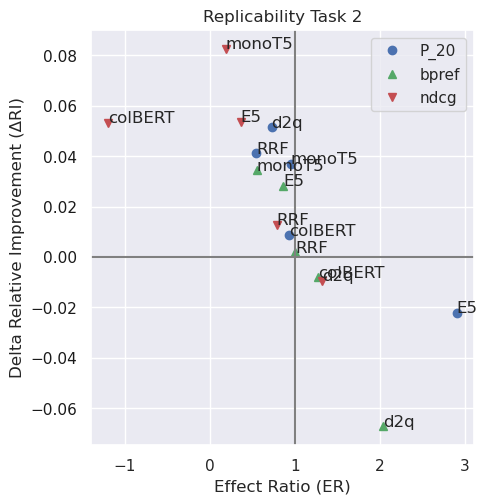

In [232]:
dri_er_WTLT = {}

for WT, LT in zip(runs["WT"]["runs"].items(), runs["LT"]["runs"].items()):
    # evaluate run
    # if WT[0].endswith("E5"):
    #     continue
    rpl_eval = RplEvaluator(qrel_orig_path=runs["WT"]["qrel"]["path"],
                            run_b_orig_path=runs["WT"]["pivot"]["path"],
                            run_a_orig_path=WT[1]["path"],
                            run_b_rep_path=runs["LT"]["pivot"]["path"],
                            run_a_rep_path=LT[1]["path"],
                            qrel_rpl_path=runs["LT"]["qrel"]["path"])

    rpl_eval.trim()
    rpl_eval.evaluate()

    # save dri, er and pval
    runs["LT"]["runs"][WT[0]]["dri"] = rpl_eval.dri()
    runs["LT"]["runs"][WT[0]]["er"] = rpl_eval.er()
    runs["LT"]["runs"][WT[0]]["pval"] = rpl_eval.ttest()

    dri_er_WTLT[WT[0]] = {"dri": rpl_eval.dri(), "er": rpl_eval.er()}


measures = ['P_20', 'bpref', 'ndcg']
marker_color = [('o', 'b'), ('^', 'g'), ('v', 'r')]

fig, ax1 = plt.subplots(figsize=(5, 5))
ax1.set_xlabel('Effect Ratio (ER)')
ax1.set_ylabel(u'Delta Relative Improvement (ΔRI)')

for measure, mk in zip(measures, marker_color):
    ax1.plot([dri_er_WTLT[r]['er'][measure] for r in dri_er_WTLT.keys()],
             [dri_er_WTLT[r]['dri'][measure] for r in dri_er_WTLT.keys()],
             marker=mk[0], color=mk[1], linestyle='None', label=measure)

ax1.tick_params(axis='y', labelcolor='k')
fig.tight_layout()
plt.axhline(0, color='grey')
plt.axvline(1, color='grey')
plt.legend()
plt.title('Replicability Task 2')

for m in measures:
  for r in dri_er_WTST.keys():
    plt.text(x = dri_er_WTLT[r]['er'][m], 
             y = dri_er_WTLT[r]['dri'][m],
             s = r) 

plt.show()

# Replicability

In [175]:
table = []
measures=['P_20', 'ndcg', 'bpref']

for subcollection , content in runs.items(): 
    for run_name, info in content["runs"].items():
        for measure in measures:
            table.append(
                {"sub-collection": subcollection, 
                 "run": run_name, 
                 "measure": measure, 
                 "value": info.get('arp').get(measure)}
                )
            if info.get('dri'):
                table.append(
                    {"sub-collection": subcollection,
                    "run": run_name,
                    "measure": measure+"_dri",
                    "value": info.get('dri').get(measure)}
                )
            if info.get('er'):
                table.append(
                    {"sub-collection": subcollection,
                    "run": run_name,
                    "measure": measure+"_er",
                    "value": info.get('er').get(measure)}
                )
            if info.get('pval'):
                table.append(
                    {"sub-collection": subcollection,
                    "run": run_name,
                    "measure": measure+"_pval",
                    "value": info.get('pval').get("advanced").get(measure)}
                )


    for measure in measures:
        table.append(
            {"sub-collection": subcollection, "run": "baseline", "measure": measure, "value": content.get('pivot').get('arp').get(measure)}
        )    

In [176]:
pd.DataFrame(table)

,sub-collection,run,measure,value
0,WT,E5,P_20,0.035185
1,WT,E5,ndcg,0.150477
2,WT,E5,bpref,0.255404
3,WT,colBERT,P_20,0.072222
4,WT,colBERT,ndcg,0.275879
...,...,...,...,...
121,LT,RRF,bpref_er,1.007366
122,LT,RRF,bpref_pval,0.755765
123,LT,baseline,P_20,0.084677
124,LT,baseline,ndcg,0.305694


In [177]:
pd.DataFrame(table).pivot(index=["measure", "run"], columns="sub-collection", values="value")

sub-collection             LT        ST        WT
measure    run                                   
P_20       E5        0.087903  0.065726  0.035185
           RRF       0.087500  0.068952  0.074815
           baseline  0.084677  0.067339  0.069630
           colBERT   0.087097  0.070565  0.072222
           d2q       0.091129  0.071774  0.078519
           monoT5    0.095968  0.081452  0.081481
P_20_dri   RRF       0.041135  0.050516       NaN
           colBERT   0.008663 -0.010670       NaN
           d2q       0.051469  0.061791       NaN
           monoT5    0.036879 -0.039368       NaN
P_20_er    RRF       0.544355  0.311060       NaN
           colBERT   0.933180  1.244240       NaN
           d2q       0.725806  0.498992       NaN
           monoT5    0.952621  1.190776       NaN
P_20_pval  RRF       0.268928  0.590523       NaN
           colBERT   0.189927  0.875420       NaN
           d2q       0.302818  0.547135       NaN
           monoT5    0.229413  0.997823       NaN
bpref      E5        0.370548  0.354006  0.255404
           RRF       0.347453  0.327578  0.346106
           baseline  0.323970  0.314200  0.313709
           colBERT   0.337591  0.317242  0.324366
           d2q       0.368159  0.331125  0.335431
           monoT5    0.336827  0.343508  0.336959
bpref_dri  RRF       0.001823  0.031731       NaN
           colBERT  -0.008074  0.024287       NaN
           d2q      -0.067158  0.015374       NaN
           monoT5    0.034426 -0.019164       NaN
bpref_er   RRF       1.007366  0.573876       NaN
           colBERT   1.278170  0.285501       NaN
           d2q       2.034334  0.779183       NaN
           monoT5    0.553007  1.260541       NaN
bpref_pval RRF       0.755765  0.784457       NaN
           colBERT   0.668054  0.826411       NaN
           d2q       0.300398  0.894049       NaN
           monoT5    0.996873  0.849841       NaN
ndcg       E5        0.313382  0.299969  0.150477
           RRF       0.314451  0.282015  0.284528
           baseline  0.305694  0.271700  0.268898
           colBERT   0.297330  0.274782  0.275879
           d2q       0.326987  0.286505  0.285061
           monoT5    0.310649  0.302152  0.295462
ndcg_dri   RRF       0.012809  0.003491       NaN
           colBERT   0.053323  0.014619       NaN
           d2q      -0.009545  0.005619       NaN
           monoT5    0.082582 -0.013289       NaN
ndcg_er    RRF       0.785557  0.925333       NaN
           colBERT  -1.198138  0.441438       NaN
           d2q       1.317376  0.915962       NaN
           monoT5    0.186504  1.146342       NaN
ndcg_pval  RRF       0.226599  0.945053       NaN
           colBERT   0.411926  0.966870       NaN
           d2q       0.150096  0.960017       NaN
           monoT5    0.580301  0.817405       NaN

In [178]:
rpl_eval = RplEvaluator(qrel_orig_path=runs["WT"]["qrel"]["path"],
                        run_b_orig_path=runs["WT"]["pivot"]["path"],
                        run_a_orig_path=runs["WT"]["runs"]["d2q"]["path"],
                        run_b_rep_path=runs["ST"]["pivot"]["path"],
                        run_a_rep_path=runs["ST"]["runs"]["d2q"]["path"],
                        qrel_rpl_path=runs["ST"]["qrel"]["path"])

rpl_eval.trim()
rpl_eval.evaluate()

In [179]:
measures = ['P_20', 'bpref', 'ndcg']
# ER
print("Effect ratio (ER)")
print('------------------------------------------------------------------')
er = rpl_eval.er()
for measure, value in er.items():
    if measure in measures:
        print_simple_line(measure, 'ER', value)

# DRI
print("\n\nDelta Relative Improvement (DRI)")
print('------------------------------------------------------------------')
dri = rpl_eval.dri()
for measure, value in dri.items():
    if measure in measures:
        print_simple_line(measure, 'DRI', value)

# ttest
pvals = rpl_eval.ttest()
print("\n\nTwo-tailed unpaired t-test (p-value)")
print('------------------------------------------------------------------')
for measure, value in pvals.get('baseline').items():
    if measure in measures:
        print_base_adv(measure, 'PVAL', value, pvals.get('advanced').get(measure))

Effect ratio (ER)
------------------------------------------------------------------
bpref                    ER      0.7792
P_20                     ER      0.4990
ndcg                     ER      0.9160


Delta Relative Improvement (DRI)
------------------------------------------------------------------
bpref                    DRI     0.0154
P_20                     DRI     0.0618
ndcg                     DRI     0.0056


Two-tailed unpaired t-test (p-value)
------------------------------------------------------------------
bpref                    PVAL    BASE    0.9882    ADV     0.8940
P_20                     PVAL    BASE    0.8315    ADV     0.5471
ndcg                     PVAL    BASE    0.9229    ADV     0.9600


In [180]:
result_table.reset_index()

sub-collection,measure,run,WT,ST,LT,"RD(WT, ST)","RD(WT, LT)"
0,P_20,E5,0.035185,0.065726,0.087903,0.030541,0.052718
1,P_20,RRF,0.074815,0.068952,0.087500,0.005863,0.012685
2,P_20,baseline,0.069630,0.067339,0.084677,0.002291,0.015048
3,P_20,colBERT,0.072222,0.070565,0.087097,0.001658,0.014875
4,P_20,d2q,0.078519,0.071774,0.091129,0.006744,0.012611
5,P_20,monoT5,0.081481,0.081452,0.095968,0.000030,0.014486
6,bpref,E5,0.255404,0.354006,0.370548,0.098602,0.115144
7,bpref,RRF,0.346106,0.327578,0.347453,0.018529,0.001346
8,bpref,baseline,0.313709,0.314200,0.323970,0.000491,0.010261
9,bpref,colBERT,0.324366,0.317242,0.337591,0.007123,0.013225


In [181]:
result_table

sub-collection          WT        ST        LT  RD(WT, ST)  RD(WT, LT)
measure run                                                           
P_20    E5        0.035185  0.065726  0.087903    0.030541    0.052718
        RRF       0.074815  0.068952  0.087500    0.005863    0.012685
        baseline  0.069630  0.067339  0.084677    0.002291    0.015048
        colBERT   0.072222  0.070565  0.087097    0.001658    0.014875
        d2q       0.078519  0.071774  0.091129    0.006744    0.012611
        monoT5    0.081481  0.081452  0.095968    0.000030    0.014486
bpref   E5        0.255404  0.354006  0.370548    0.098602    0.115144
        RRF       0.346106  0.327578  0.347453    0.018529    0.001346
        baseline  0.313709  0.314200  0.323970    0.000491    0.010261
        colBERT   0.324366  0.317242  0.337591    0.007123    0.013225
        d2q       0.335431  0.331125  0.368159    0.004306    0.032729
        monoT5    0.336959  0.343508  0.336827    0.006549    0.000132
ndcg    E5        0.150477  0.299969  0.313382    0.149492    0.162905
        RRF       0.284528  0.282015  0.314451    0.002514    0.029922
        baseline  0.268898  0.271700  0.305694    0.002803    0.036797
        colBERT   0.275879  0.274782  0.297330    0.001097    0.021451
        d2q       0.285061  0.286505  0.326987    0.001444    0.041926
        monoT5    0.295462  0.302152  0.310649    0.006690    0.015187

In [228]:
table = []
measures=['P_20', 'ndcg', 'bpref']

for measure in measures:
    for run in runs["WT"]["runs"].keys():
        rd_WTST = abs(runs["WT"]["runs"][run]["arp"][measure] - runs["ST"]["runs"][run]["arp"][measure])
        rd_WTLT = abs(runs["WT"]["runs"][run]["arp"][measure] - runs["LT"]["runs"][run]["arp"][measure])
        table.append(
            {
                "measure": measure,
                "run": run,
                "WT": runs["WT"]["runs"][run].get("arp", {}).get(measure),
                "ST": runs["ST"]["runs"][run].get("arp", {}).get(measure),
                "LT": runs["LT"]["runs"][run].get("arp", {}).get(measure),
                "RD(WT, ST)": rd_WTST,
                "RD(WT, LT)": rd_WTLT,
                "ER(WT-ST)": runs["ST"]["runs"][run].get("er",{}).get(measure),
                "ER(WT-LT)": runs["LT"]["runs"][run].get("er",{}).get(measure),
                "DRI(WT-ST)": runs["ST"]["runs"][run].get("dri",{}).get(measure),
                "DRI(WT-LT)": runs["LT"]["runs"][run].get("dri",{}).get(measure),
                "PVAL(WT-ST)": runs["ST"]["runs"][run].get("pval",{}).get("advanced",{}).get(measure),
                "PVAL(WT-LT)": runs["LT"]["runs"][run].get("pval",{}).get("advanced",{}).get(measure),

            }
        )
    
    rd_WTST = abs(runs["WT"]["pivot"]["arp"][measure] - runs["ST"]["pivot"]["arp"][measure])
    rd_WTLT = abs(runs["WT"]["pivot"]["arp"][measure] - runs["LT"]["pivot"]["arp"][measure])
    table.append(
        {
            "measure": measure,
            "run": "BM25",
            "WT": runs["WT"]["pivot"].get("arp", {}).get(measure),
            "ST": runs["ST"]["pivot"].get("arp", {}).get(measure),
            "LT": runs["LT"]["pivot"].get("arp", {}).get(measure),
            "RD(WT, ST)": rd_WTST,
            "RD(WT, LT)": rd_WTLT,


        }
    )

In [230]:
custom_dict = {"BM25": 0, "E5": 1, "colBERT": 2, "monoT5": 3, "d2q": 4, "RRF": 5}


pd.DataFrame(table).to_csv("../results/ee_table.tsv", sep="\t")